# Backtests a strategy using three moving averages on any indices such as Nifty50, SPY,
HSI and so on.
1. Compute three moving averages of 20, 40, and 80.
2. Go long when the price crosses above all three moving averages.
3. Exit the long position when the price crosses below any of the three moving
averages.
4. Go short when the price crosses below all three moving averages.
5. Exit the short position when the price crosses above any of the three moving
averages.
6. Optional: Optimise all three moving averages

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import talib 
import pyfolio as pf
import datetime as dt
warnings.filterwarnings('ignore')

C:\Users\ACER\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
# Creating a function to download the data
def get_data(ticker,start,end,interval=None):
    import yfinance as yf
    
    if interval:
        df= yf.download(ticker,start,end,interval= interval)
        
    else:
        df= yf.download(ticker,start,end)
        
    df.drop(columns=['Close'], inplace=True)
    df.rename(columns={'Adj Close':'close'}, inplace=True)
    df.columns= df.columns.str.lower()
    
    return df

In [4]:
# preparing variables for downloading data
end1= dt.date.today()
start1= end1-pd.Timedelta(days=252*20)
ticker1= ['^NSEI']

In [9]:
df1=get_data(ticker1,start1,end1)

[*********************100%***********************]  1 of 1 completed


In [10]:
df1.head()

,open,high,low,close,volume
Date,,,,,
2009-08-28,4688.399902,4743.750000,4651.399902,4732.350098,0
2009-08-31,4730.850098,4730.850098,4635.000000,4662.100098,0
2009-09-01,4662.200195,4735.899902,4600.649902,4625.350098,0
2009-09-02,4624.000000,4650.450195,4576.600098,4608.350098,0
2009-09-03,4608.750000,4647.350098,4581.049805,4593.549805,0


In [11]:
df1.tail()

,open,high,low,close,volume
Date,,,,,
2023-06-09,18655.900391,18676.650391,18555.400391,18563.400391,221800
2023-06-12,18595.050781,18633.599609,18559.750000,18601.500000,179500
2023-06-13,18631.800781,18728.900391,18631.800781,18716.150391,233200
2023-06-14,18744.599609,18769.699219,18690.000000,18755.900391,261400
2023-06-15,18774.449219,18794.099609,18669.050781,18688.099609,263000


In [13]:
df1.shape

(3383, 5)

In [14]:
class backtesting1:
    
    def __init__(self,df, ma1, ma2, ma3):
        self.df=df
        self.ma1= ma1
        self.ma2= ma2
        self.ma3= ma3
        self.indicators()
        self.signal()
        self.returns()
        
    def indicators(self):
    
        self.df['ma1']= self.df['close'].rolling(window=self.ma1).mean()
        self.df['ma2']= self.df['close'].rolling(window=self.ma2).mean()
        self.df['ma3']= self.df['close'].rolling(window=self.ma3).mean()
        
    def signal(self):
        #As per the conditions of the strategy, if price crocess even one of the moving average then the position should be exited. 
        #Thus the signal column will also act as the position column if shifted by one row
        
        self.df['signal']= np.where((self.df['close']> self.df['ma1']) &
                                    (self.df['close']> self.df['ma2']) &
                                    (self.df['close']> self.df['ma3']),
                                    1,0)
        self.df['signal']= np.where((self.df['close']<self.df['ma1'])&
                                   (self.df['close']<self.df['ma2'])&
                                   (self.df['close']<self.df['ma3']),
                                   -1, self.df['signal'])
        
        
        
        self.df['position']= self.df['signal'].shift(1)
        
    def returns(self):
        self.df['bnh_returns']= np.log(self.df['close']/self.df['close'].shift(1))
        self.df['strategy_returns']= self.df['position']*self.df['bnh_returns']
        print('Total strategy returns are: ', self.df['strategy_returns'].cumsum()[-1])
        
    def analysis(self):
        self.df[['close','ma1', 'ma2', 'ma3']].plot(figsize=(15,6), grid= True)
        self.df[['strategy_returns', 'bnh_returns']].cumsum().plot(figsize=(15,6), grid= True)
        plt.show()
        
        pf.create_simple_tear_sheet(self.df['strategy_returns'])
                                
         
        

In [15]:
nifty= df1.copy()
test1= backtesting1(nifty,20,40,80)

Total strategy returns are:  0.8462741980464232


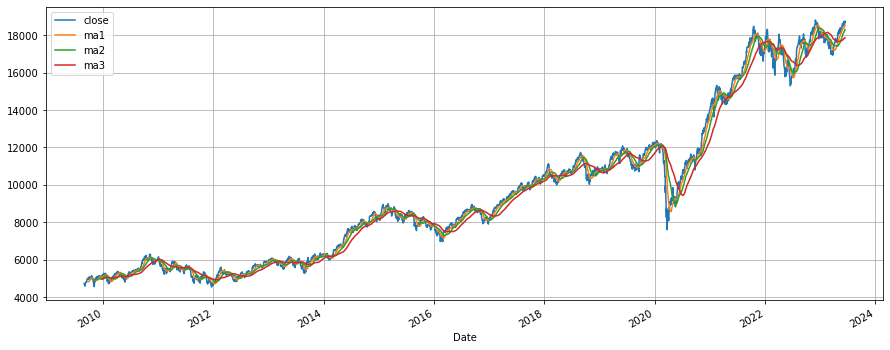

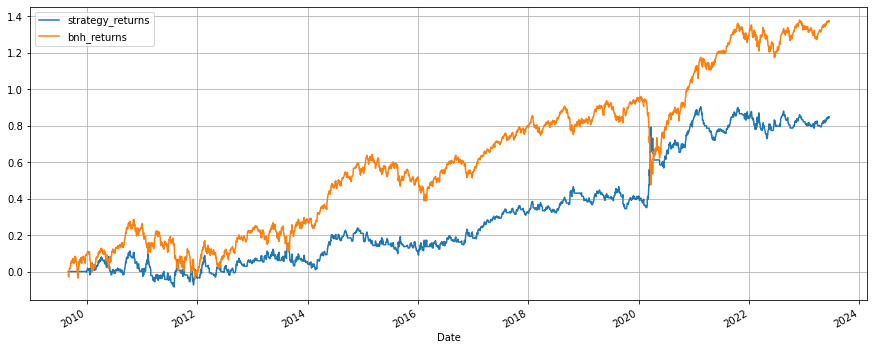

Start date,2009-08-28
End date,2023-06-15
Total months,161
,Backtest
Annual return,5.4%
Cumulative returns,102.3%
Annual volatility,14.6%
Sharpe ratio,0.43
Calmar ratio,0.26
Stability,0.85
Max drawdown,-21.0%


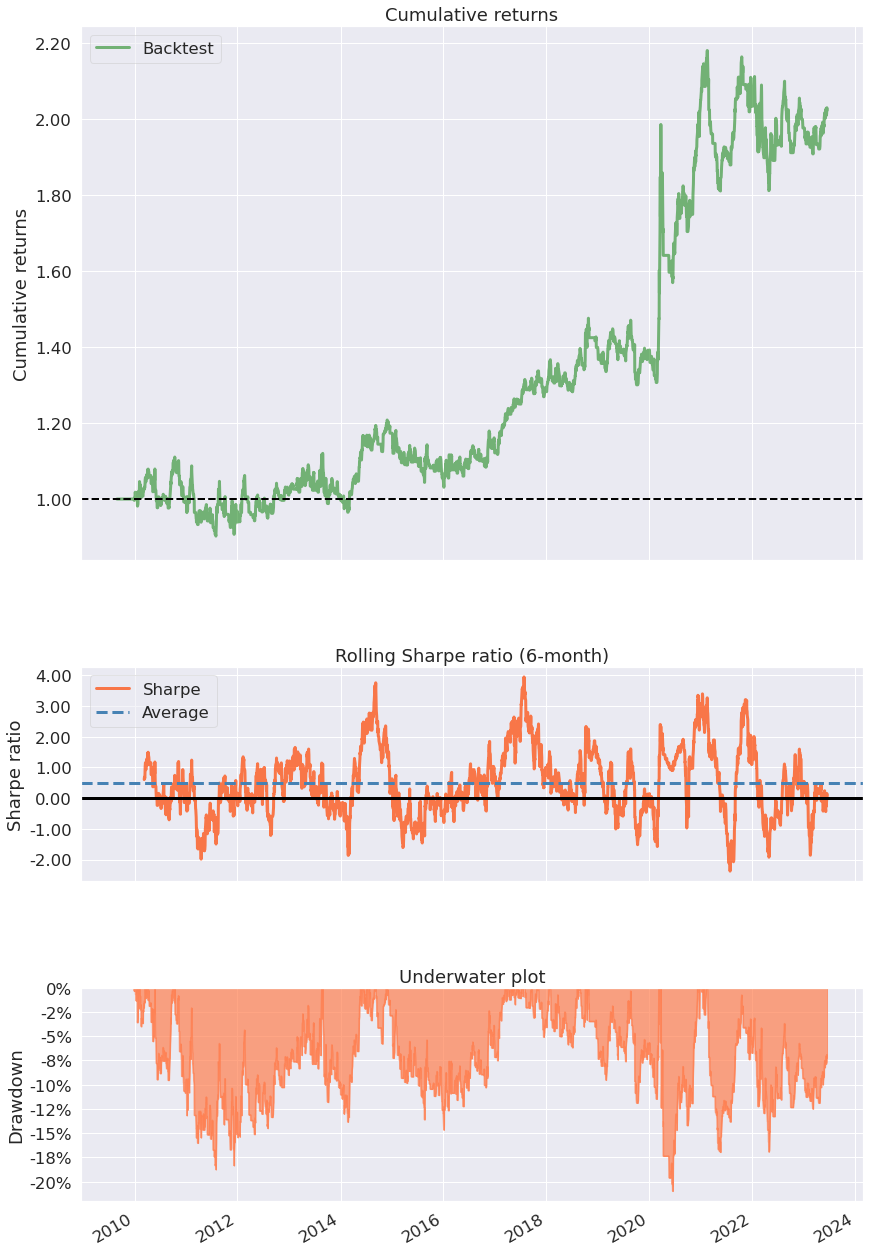

In [16]:
test1.analysis()